In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import openai
import os
from llmlex.kanlex import KANLEX
import llmlex

In [2]:
client = openai.OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=os.getenv("OPENROUTER_API_KEY") if os.getenv("OPENROUTER_API_KEY") else "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",
)
llmlex.llm.check_key_limit(client)

73.23025195000002

# Example 1

In [3]:
def univariate_function(x):
    return 2.0 * torch.exp(-3.0 * x[:,[0]]) + torch.exp(-x[:,[0]])

# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 4, 4, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 13:38:52,870 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.74e-03 | test_loss: 1.80e-03 | reg: 1.75e+01 | : 100%|█| 50/50 [00:23<00:00,  2.15it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 13:39:17,452 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 13:39:17,468 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 13:39:18,216 - LLMLEx.kanLEx - INFO - Final train loss: 0.0017440931405872107


0.0017440931405872107

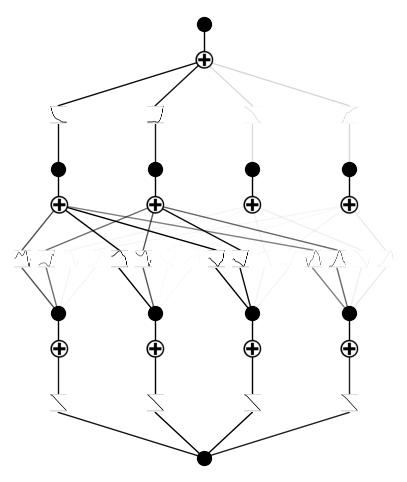

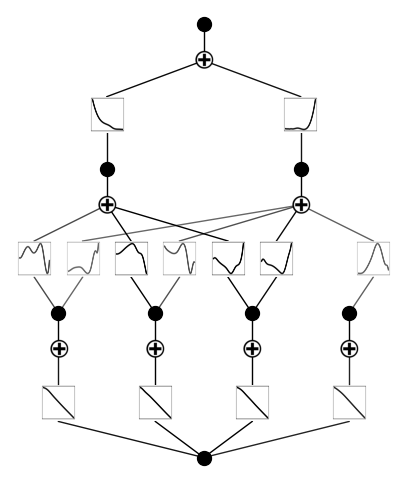

In [4]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

This suggests retraining with arch [1,4,2,1], however the first layer is all linear. We therefore proceed with architecture [1,2,1]

In [5]:
# Initialize a KANSR instance for the multivariate function
univariate_kansr = KANLEX(
    client=client,
    width=[1, 2, 1],
    grid=7,
    k=3,
    seed=0
)

univariate_dataset = univariate_kansr.create_dataset(
    f=univariate_function,
    ranges=(0.1, 5),
    n_var=1,
    train_num=10000,
    test_num=1000
)

checkpoint directory created: ./model
saving model version 0.0


2025-04-12 13:39:18,858 - LLMLEx.kanLEx - INFO - Training KAN model with LBFGS optimiser for 50 steps
| train_loss: 1.45e-04 | test_loss: 1.43e-04 | reg: 7.57e+00 | : 100%|█| 50/50 [00:06<00:00,  7.25it


saving model version 0.1
Unpruned model. Pruning? True


2025-04-12 13:39:25,990 - LLMLEx.kanLEx - INFO - Pruning model with node_th=0.2, edge_th=0.2
2025-04-12 13:39:25,998 - LLMLEx.kanLEx - INFO - Pruned model:


saving model version 0.2


2025-04-12 13:39:26,221 - LLMLEx.kanLEx - INFO - Final train loss: 0.00014536567323375493


0.00014536567323375493

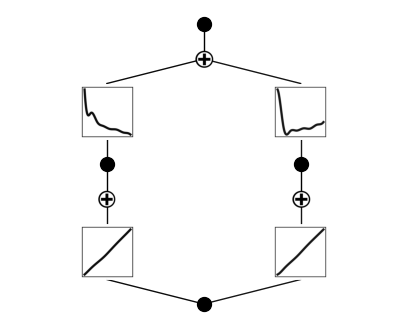

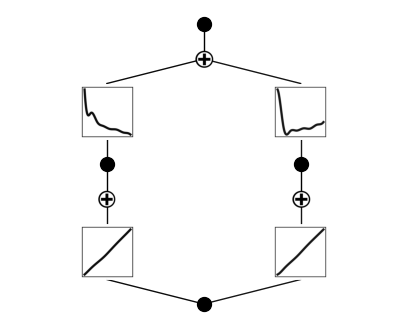

In [6]:
univariate_kansr.train_kan(
    dataset=univariate_dataset,
    opt="LBFGS",
    steps=50,
    prune=True,
    node_th=0.2,
    edge_th=0.2
)

Now fit the KAN

2025-04-12 13:39:26,616 - LLMLEx.kanLEx - WARNING - Using default exit condition of 0.001. Consider passing 'overall_nchi_squared'as an exit condition - this is the n_chi_squared of the entire model on its inputs. It's not the default as this is not necessarily meaningful for each individual activation function.
2025-04-12 13:39:26,616 - LLMLEx.kanLEx - INFO - Converting KAN model to symbolic expressions (exit_condition=0.001)
2025-04-12 13:39:26,752 - llmlex.llmlex - INFO - Processing KAN model connections
2025-04-12 13:39:26,754 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,0)


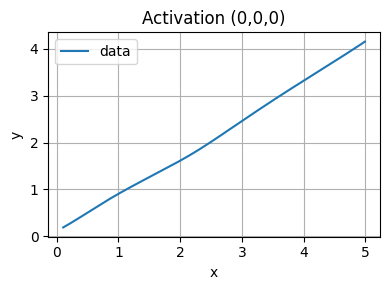

2025-04-12 13:39:26,851 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,0)
2025-04-12 13:39:27,408 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.3629921674728394, for constant: [2.09039472]
2025-04-12 13:39:27,409 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:39:28,810 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:39:28,810 - llmlex.llmlex - INFO - Initial population best: score=-0.0016438951715826988, params=[0.80814346 0.06163361], ansatz: params[0] * x + params[1]...


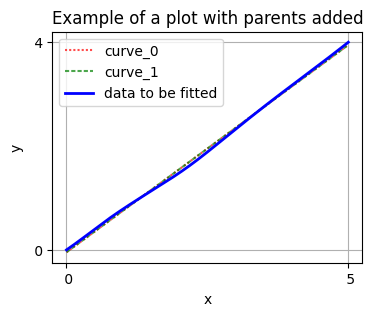

2025-04-12 13:39:28,871 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 13:39:34,003 - llmlex.llmlex - INFO - Generation 1 best: score=-0.002592196222394705, params=[0.8266736], ansatz: params[0] * x...
2025-04-12 13:39:34,004 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 13:39:34,004 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,0): params[0] * x + params[1], with score -0.0016438951715826988 and parameters [0.808 0.062]


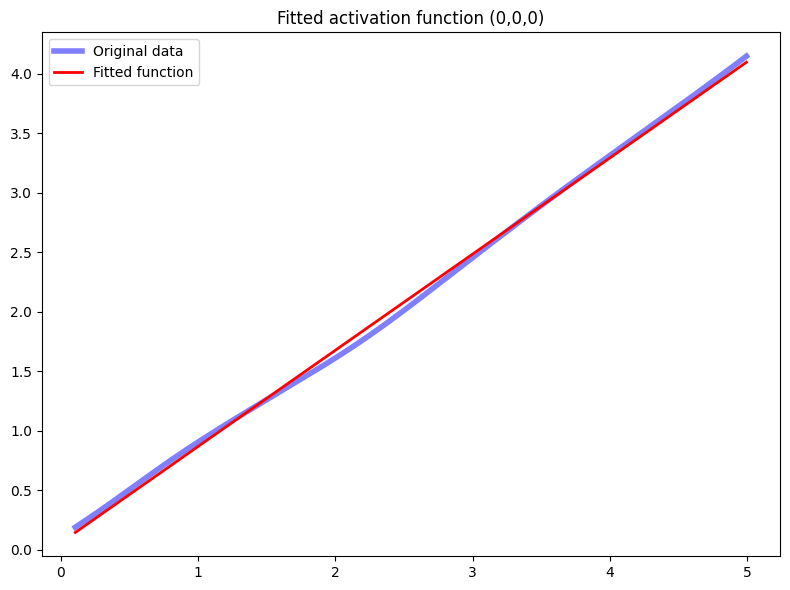

2025-04-12 13:39:34,101 - llmlex.llmlex - INFO - Processing non-symbolic activation function (0,0,1)


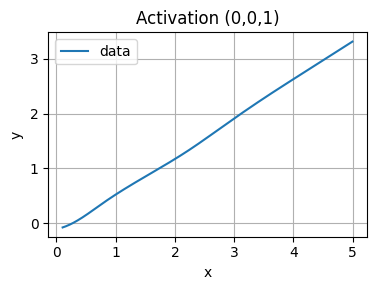

2025-04-12 13:39:34,171 - llmlex.llmlex - INFO - Running genetic algorithm for connection (0,0,1)
2025-04-12 13:39:34,173 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -1.3156142234802246, for constant: [1.56426282]
2025-04-12 13:39:34,173 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:39:40,637 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:39:40,638 - llmlex.llmlex - INFO - Initial population best: score=-0.00042952908552251756, params=[ 0.70408739 -0.2032762 ], ansatz: params[0] * x + params[1]...
2025-04-12 13:39:40,639 - llmlex.llmlex - INFO - Exit condition met after initial population
2025-04-12 13:39:40,639 - llmlex.llmlex - INFO - Successfully found expression for connection (0,0,1)



API Call Statistics:
  Successful calls (end-to-end): 3
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 3 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 3 succeeded, 0 failed (100.00% success)
  Function Conversion: 3 succeeded, 0 failed (100.00% success)
  Curve Fitting: 3 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (0,0,1): params[0] * x + params[1], with score -0.00042952908552251756 and parameters [ 0.704 -0.203]


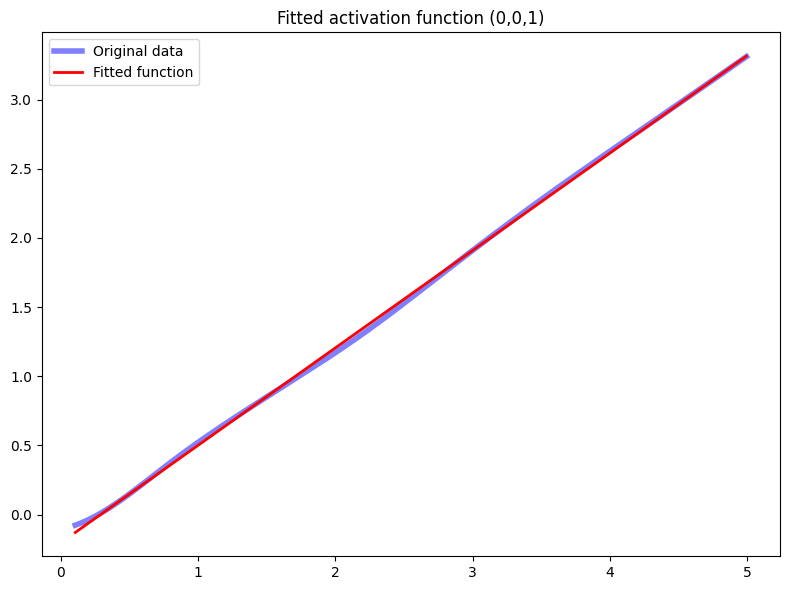

2025-04-12 13:39:40,739 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,0,0)


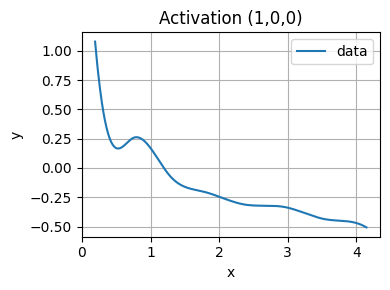

2025-04-12 13:39:40,808 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,0,0)
2025-04-12 13:39:40,810 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -3.064791440963745, for constant: [-0.14927042]
2025-04-12 13:39:40,810 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:39:43,067 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:39:43,067 - llmlex.llmlex - INFO - Initial population best: score=-0.21112704277038574, params=[ 0.71164169 -0.45684313  0.40425674], ansatz: params[0] * np.exp(-x) + params[1] * np.sin(params[2] * x)...


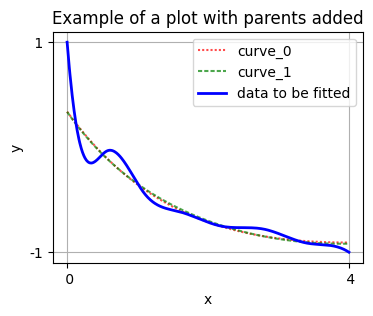

2025-04-12 13:39:43,120 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 13:39:45,464 - llmlex.llmlex - INFO - Generation 1 best: score=-0.1961906999349594, params=[ 1.80374894e+00  1.77475255e+00  1.58317765e-04  1.00993582e+00
 -1.22544110e-01], ansatz: params[0] * np.exp(-params[1] * x) * np.cos(params[2] * x + params[3]) + params[4] * x...
2025-04-12 13:39:45,465 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 13:39:45,465 - llmlex.llmlex - INFO - Successfully found expression for connection (1,0,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,0,0): params[0] * np.exp(-params[1] * x) * np.cos(params[2] * x + params[3]) + params[4] * x, with score -0.1961906999349594 and parameters [ 1.804  1.775  0.     1.01  -0.123]


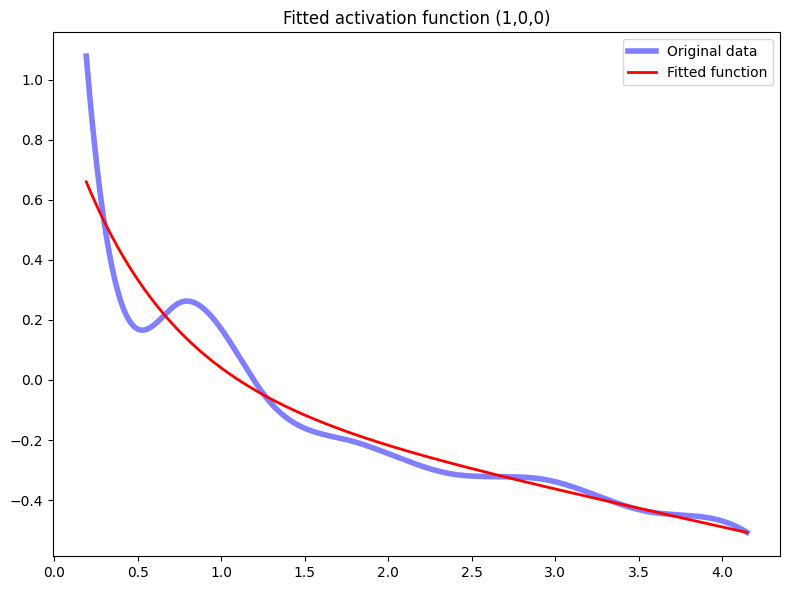

2025-04-12 13:39:45,564 - llmlex.llmlex - INFO - Processing non-symbolic activation function (1,1,0)


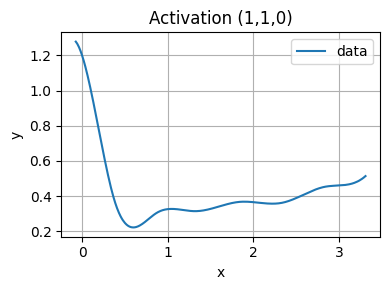

2025-04-12 13:39:45,625 - llmlex.llmlex - INFO - Running genetic algorithm for connection (1,1,0)
2025-04-12 13:39:45,626 - llmlex.llmlex - INFO - Constant function is not a good fit: Score: -20.439205169677734, for constant: [0.45091582]
2025-04-12 13:39:45,627 - llmlex.llmlex - INFO - Generating initial population asynchronously
2025-04-12 13:39:47,508 - llmlex.llmlex - INFO - Generated 3 individuals
2025-04-12 13:39:47,508 - llmlex.llmlex - INFO - Initial population best: score=-0.9365249872207642, params=[ 1.14802407  3.14945065 -0.47063951  0.41520134  3.21318981], ansatz: params[0] * np.exp(-params[1] * x) + params[2] * np.sin(params[3] * x + params[4])...


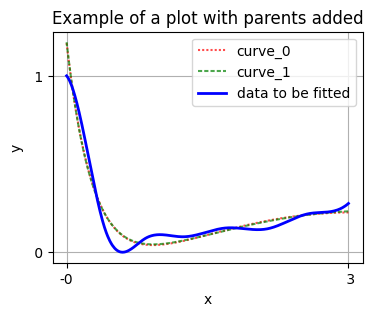

2025-04-12 13:39:47,568 - llmlex.llmlex - INFO - Generation 1/1: Generating 3 new individuals. Elitism? False
2025-04-12 13:39:51,989 - llmlex.llmlex - INFO - Generation 1 best: score=-0.7596034407615662, params=[ 1.33299173  2.53147772 -0.16293808  1.76007183  2.00898829  0.06538762], ansatz: params[0] * np.exp(-params[1] * x) + params[2] * np.sin(params[3] * x + params[4]) + params[5] * x**...
2025-04-12 13:39:51,990 - llmlex.llmlex - INFO - Genetic algorithm completed after 2 generations
2025-04-12 13:39:51,990 - llmlex.llmlex - INFO - Successfully found expression for connection (1,1,0)



API Call Statistics:
  Successful calls (end-to-end): 6
  Failed calls: 0
  Success rate: 100.00%

Breakdown by processing stage:
  Api Call: 6 succeeded, 0 failed (100.00% success)
  Ansatz Extraction: 6 succeeded, 0 failed (100.00% success)
  Function Conversion: 6 succeeded, 0 failed (100.00% success)
  Curve Fitting: 6 succeeded, 0 failed (100.00% success)

Error types:
  No errors
Approximation for (1,1,0): params[0] * np.exp(-params[1] * x) + params[2] * np.sin(params[3] * x + params[4]) + params[5] * x**2, with score -0.7596034407615662 and parameters [ 1.333  2.531 -0.163  1.76   2.009  0.065]


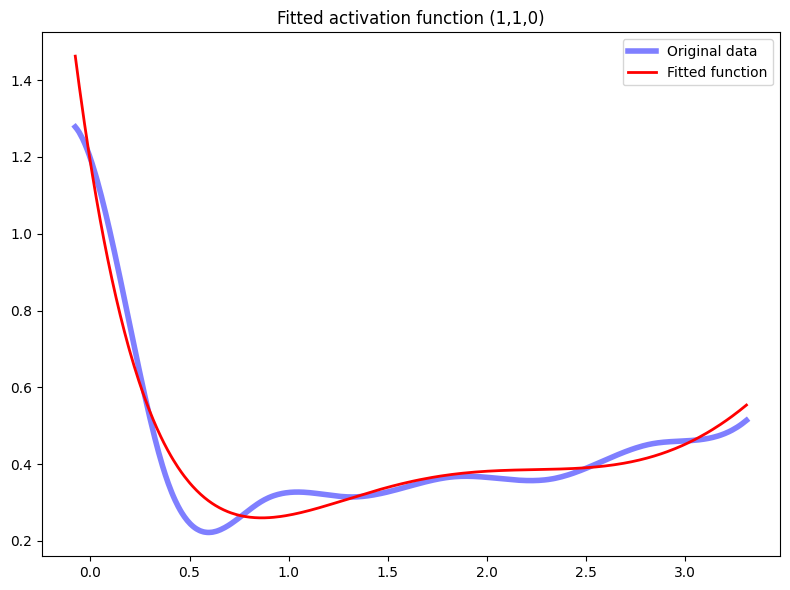

2025-04-12 13:39:52,068 - llmlex.llmlex - INFO - KAN conversion complete: 4 total connections
2025-04-12 13:39:52,069 - llmlex.llmlex - INFO - Connection breakdown: 0 symbolic, 0 zero, 4 processed
2025-04-12 13:39:52,220 - llmlex.llmlex - INFO - API key usage whilst this kan_to_symbolic was running: $0.00
2025-04-12 13:39:52,221 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 0): params[0] * x + params[1], has parameters [0.8 0.1]
2025-04-12 13:39:52,221 - LLMLEx.kanLEx - INFO - Approximation for (0, 0, 1): params[0] * x + params[1], has parameters [ 0.7 -0.2]
2025-04-12 13:39:52,222 - LLMLEx.kanLEx - INFO - Approximation for (1, 0, 0): params[0] * np.exp(-params[1] * x) * np.cos(params[2] * x + params[3]) + params[4] * x, has parameters [ 1.8  1.8  0.   1.  -0.1]
2025-04-12 13:39:52,223 - LLMLEx.kanLEx - INFO - Approximation for (1, 1, 0): params[0] * np.exp(-params[1] * x) + params[2] * np.sin(params[3] * x + params[4]) + params[5] * x**2, has parameters [ 1.3  2.5 -0.2  1.8  2.   

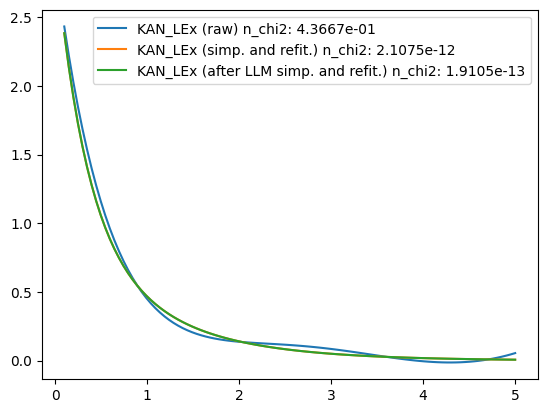

2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - 
###############################
# Raw and Refitted Results for output 0 (4sf): #
###############################
2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - Raw expression n_chi2 4.367e-01: -0.09903*x0 + 0.03242*(x0 - 0.2887)**2 - 0.1629*sin(1.239*x0 + 1.651) - 0.007553 + 2.23*exp(-1.782*x0) + 1.617*exp(-1.434*x0)*cos(0.0001279*x0 + 1.01)
2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - Refitted expression n_chi2 2.107e-12: 2*exp(-3*x0) + 1.67*exp(-1*x0)*cos(2.627e-05*x0 - 0.9287)
2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - Best LLM expression n_chi2 1.910e-13: (2.455*exp(2*x0)*cos(4.303e-05*x0 + 1.151) + 2)*exp(-3*x0)
2025-04-12 13:40:29,885 - LLMLEx.kanLEx - INFO - 
###############################
# Final formula for output 0: #
###############################
2025-04-12 13:40:29,886 - LLMLEx.kanLEx - INFO - Best expression n_chi2 1.910e-13 from LLMsimplified fit: (2.45509927467898*np.exp(2.00009650576704*x0)*np.cos(4.303497

In [7]:
best_expressions, best_chi_squareds, results_dicts, results_all_dicts = univariate_kansr.get_symbolic(
    client=client,
    population=3,
    generations=2,
    temperature=0.1,
    gpt_model="openai/gpt-4o",
    verbose=1,
    use_async=True,
    plot_fit=True,
    plot_parents=True,
    demonstrate_parent_plotting=True
)

In [8]:
best_expressions

['(2.45509927467898*np.exp(2.00009650576704*x0)*np.cos(4.30349754836e-5*x0 + 1.15128357596695) + 2)*np.exp(-3*x0)']